# M4 - W5 Assignment: Working with time-series

Student: Loai Siwas

Working with time series is an important skill for a data scientist. Many of the data you may need to work with are either time series or have some form of time element to them. When you think about financial markets, transactions happening in stores, banks, ecommerce, orders and workload forecasting– these all are examples of time series problems.

In this assignment, you will work with forecasting sales in retail stores.

1. Download the Retail Data Analytics data from Kaggle here: https://www.kaggle.com/manjeetsingh/retaildatasetLinks to an external site.. Download the three data sets: one on stores, one on features and one on sales.
1. Merge them, do the appropriate cleaning and perform a basic EDA to understand the dataset.
1. Explore the data and perform visualizations you deem appropriate. Make sure to pay attention to the target – the weekly sales -- and how it relates to other features. Do you see some seasonality in the target and, if yes, then what kind?
1. Train a model (or models) that predicts the weekly sales in a department store. This is a time series problem so be careful with the train-test split. Evaluate the model you have trained and reason about how the store managers can use your forecast to better anticipate sales fluctuations.

Submit your solution in a Jupyter notebook and a link to a GitHub repo where you have also uploaded your code.

---

---

## PART 1:
#### Download the Retail Data Analytics data from Kaggle here: https://www.kaggle.com/manjeetsingh/retaildatasetLinks to an external site.. Download the three data sets: one on stores, one on features and one on sales.

In [1]:
# Importing necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the Stores dataset
stores_df = pd.read_csv('stores data-set.csv')

# Import the Features dataset
features_df = pd.read_csv('Features data set.csv', parse_dates=['Date'])

# Import the Sales dataset
sales_df = pd.read_csv('sales data-set.csv', parse_dates=['Date']) # , index_col='Date'

C:\Users\Loai\anaconda3\envs\venv_dataspell\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Loai\anaconda3\envs\venv_dataspell\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Loai\anaconda3\envs\venv_dataspell\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19/03/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Loai\anaconda3\envs\venv_dataspell\lib\site-packages\pandas\core\tools\datetimes.py:1063: User

In [3]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


---

## PART 2:
#### Merge them, do the appropriate cleaning and perform a basic EDA to understand the dataset.

In [6]:
# Merge the Sales and Stores datasets
sales_stores_df = pd.merge(sales_df,stores_df,on=['Store'],how='left')

In [7]:
# Merge the sales_stores_df and Features datasets
merged_df = pd.merge(sales_stores_df,features_df,on=['Store','Date'],how='left')

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [9]:
# Check for missing values
print(merged_df.isna().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64


In [10]:
# Fill missing values with 0 in the merged_df dataframe
merged_df.fillna(0,inplace=True)

In [11]:
# Drop rows with missing values
merged_df = merged_df.dropna()

In [12]:
# Check for missing values
print(merged_df.isna().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64


In [13]:
# Print the first few rows of the merged_df dataframe
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-05-02,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2010-12-02,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,2010-05-03,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [14]:
# Basic EDA
print(merged_df.shape)
print(merged_df.describe())
print(merged_df.info())

(421570, 17)
               Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       60.090059       3.361027    2590.074819     879.974298   
std        18.447931       0.458515    6052.385934    5084.538801   
min        -2.060000       2.472000       0.000000    -265.760000   
25%        46.680000

---

## PART 3:
#### Explore the data and perform visualizations you deem appropriate. Make sure to pay attention to the target – the weekly sales -- and how it relates to other features. Do you see some seasonality in the target and, if yes, then what kind?

##### Columns type

In [15]:
# print the data types of all columns
print(merged_df.dtypes)

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday_x               bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday_y               bool
dtype: object


##### Summary Statistics

In [16]:
# describe all columns in the DataFrame
merged_df.describe(include='all')

C:\Users\Loai\AppData\Local\Temp\ipykernel_91768\494852937.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_df.describe(include='all')


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570
unique,NaN,NaN,143,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,2011-12-23 00:00:00,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,3027,NaN,391909,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391909
first,NaN,NaN,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2012-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN,NaN,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,NaN


##### Data Visualization

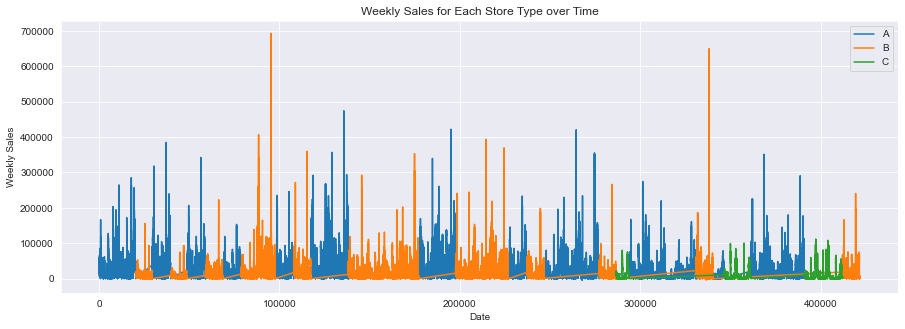

In [17]:
# Plot weekly sales over time
merged_df.groupby('Type')['Weekly_Sales'].plot(legend=True, figsize=(15,5))
plt.title('Weekly Sales for Each Store Type over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

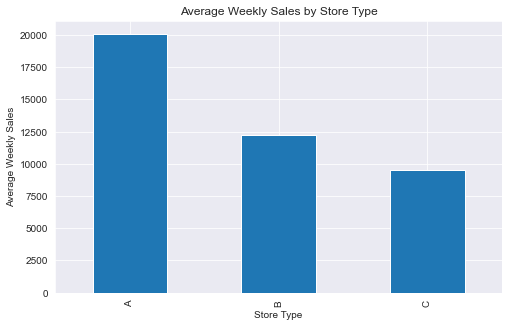

In [18]:
# Plot average weekly sales by store type
merged_df.groupby('Type')['Weekly_Sales'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
plt.show()

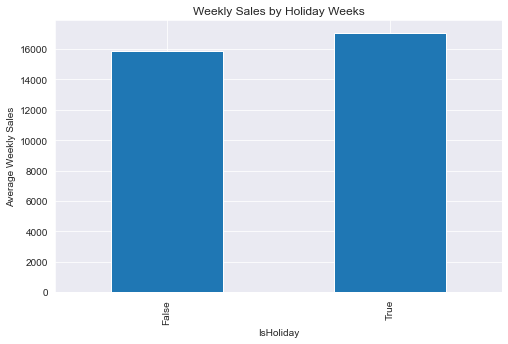

In [19]:
# Plot weekly sales by holiday weeks
merged_df.groupby('IsHoliday_x')['Weekly_Sales'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Weekly Sales by Holiday Weeks')
plt.xlabel('IsHoliday')
plt.ylabel('Average Weekly Sales')
plt.show()

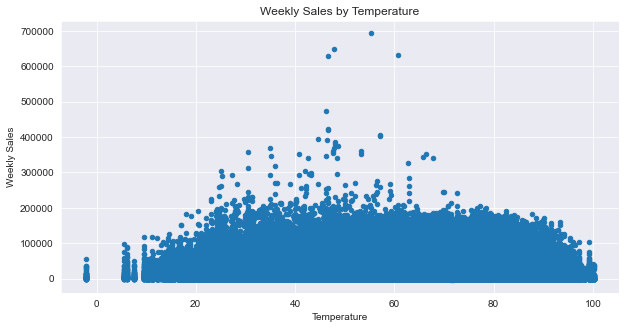

In [20]:
# Plot weekly sales by temperature
merged_df.plot(kind='scatter', x='Temperature', y='Weekly_Sales', figsize=(10,5))
plt.title('Weekly Sales by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

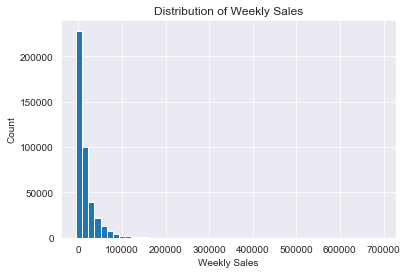

In [21]:
# Plot distribution of weekly sales
plt.hist(merged_df['Weekly_Sales'], bins=50)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Count')
plt.show()

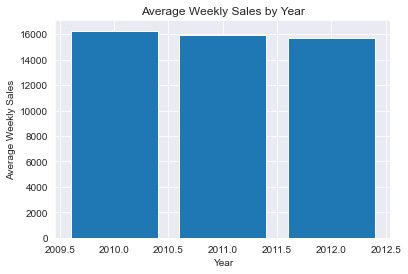

In [22]:
# Plot average weekly sales by year
merged_df['Year'] = merged_df['Date'].dt.year
avg_sales_by_year = merged_df.groupby('Year')['Weekly_Sales'].mean()
plt.bar(avg_sales_by_year.index, avg_sales_by_year)
plt.title('Average Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')
plt.show()

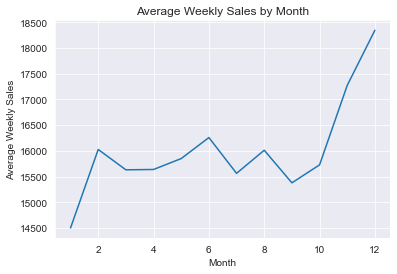

In [23]:
# Plot average weekly sales by month
merged_df['Month'] = merged_df['Date'].dt.month
avg_sales_by_month = merged_df.groupby('Month')['Weekly_Sales'].mean()
plt.plot(avg_sales_by_month.index, avg_sales_by_month)
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

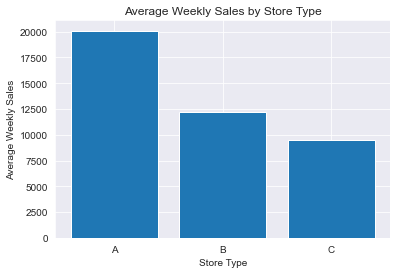

In [24]:
# Plot average weekly sales by store type
avg_sales_by_type = merged_df.groupby('Type')['Weekly_Sales'].mean()
plt.bar(avg_sales_by_type.index, avg_sales_by_type)
plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
plt.show()

##### Correlation Matrix

<AxesSubplot:>

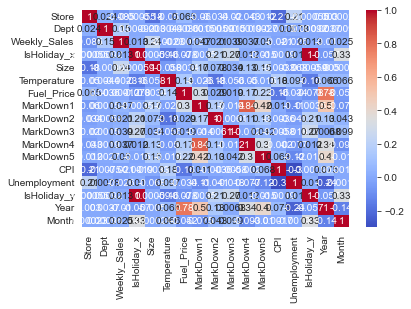

In [25]:
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

##### Distribution of Target Variable

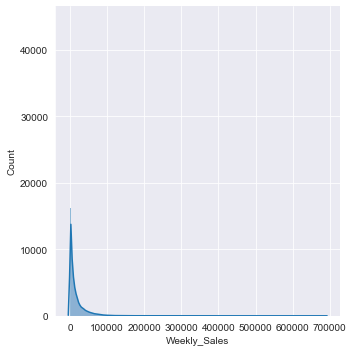

In [26]:
sns.displot(merged_df, x='Weekly_Sales', kde=True)

---

## PART 4:
#### Train a model (or models) that predicts the weekly sales in a department store. This is a time series problem so be careful with the train-test split. Evaluate the model you have trained and reason about how the store managers can use your forecast to better anticipate sales fluctuations.

In [27]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Year,Month
0,1,1,2010-05-02,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,5
1,1,1,2010-12-02,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010,12
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,2010,2
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,2010,2
4,1,1,2010-05-03,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,2010,5


In [29]:
merged_df.set_index('Date', inplace=True)
merged_df.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Year,Month
Date,,,,,,,,,,,,,,,,,,
2010-05-02,1,1,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,5
2010-12-02,1,1,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010,12
2010-02-19,1,1,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,2010,2
2010-02-26,1,1,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,2010,2
2010-05-03,1,1,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,2010,5


In [30]:
# Train-test split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(merged_df):
    train_data, test_data = merged_df.iloc[train_index], merged_df.iloc[test_index]

In [31]:
# Convert categorical variables into numeric values using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Type'])
test_data = pd.get_dummies(test_data, columns=['Type'])

In [32]:
# Define features and target variable
features = ['Store', 'Dept', 'IsHoliday_x', 'Size', 'Temperature',
            'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
            'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type_A', 'Type_B', 'Type_C']
target = 'Weekly_Sales'

In [33]:
# Train a random forest regressor model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(train_data[features], train_data[target])

RandomForestRegressor(max_depth=10, random_state=42)

In [34]:
# Make predictions on the test data
preds = rf.predict(test_data[features])

In [35]:
# Evaluate the model
# Calculate evaluation metrics
mae = mean_absolute_error(test_data[target], preds)
mse = mean_squared_error(test_data[target], preds)
rmse = np.sqrt(mse)

In [36]:
# Print evaluation metrics
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 5614.12
MSE: 112230702.50
RMSE: 10593.90


---

# End of Assignment

Student Name: Loai Siwas